<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Kaggle_Vivek_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Train= pd.read_csv('/Users/vivek_sharma/Downloads/Plaksha_ML/train.csv')
Test= pd.read_csv('/Users/vivek_sharma/Downloads/Plaksha_ML/test.csv')
Train.head()    

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [ ]:
Train.shape

(3500000, 20)

In [ ]:
Test.shape

(1500000, 19)

In [ ]:
Train= Train.drop(['Unnamed: 0'], axis='columns')

In [ ]:
Train.rename(columns = {'class':'Class'}, inplace = True)

In [ ]:
y= Train.Class
y=y.fillna(0)

In [ ]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Class, dtype: float64

In [ ]:
y = y.astype(int)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [ ]:
X= Train.drop(['Class'], axis='columns')
X.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147


In [ ]:
Train.describe()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),Class
count,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06
mean,1.000232e+00,3.599349e-04,3.409634e-04,9.992382e-01,3.546249e-04,-2.609503e-04,9.994536e-01,-4.940216e-04,1.000944e+00,-8.176786e-05,1.000253e+00,9.996171e-01,9.998163e-01,1.000160e+00,9.999674e-01,9.997972e-01,9.992375e-01,2.248649e-01,4.572371e-01
std,6.873955e-01,1.003109e+00,1.001971e+00,6.537354e-01,1.002817e+00,1.001447e+00,8.724024e-01,1.001655e+00,8.897569e-01,1.000707e+00,6.286597e-01,5.839003e-01,4.711496e-01,8.590315e-01,6.205179e-01,6.235858e-01,4.361374e-01,1.970049e-01,4.981681e-01
min,2.548815e-01,-2.102919e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,7.199480e-04,-1.727112e+00,7.693475e-08,-1.533509e+01,2.680643e-01,2.427395e-03,4.528082e-03,0.000000e+00,2.734135e-02,4.452858e-03,3.211849e-07,1.498080e-07,0.000000e+00
25%,5.625003e-01,-7.569637e-01,-8.673235e-01,5.969753e-01,-7.693463e-01,-8.680870e-01,4.781798e-01,-8.663442e-01,3.689606e-01,-4.920890e-01,5.883102e-01,6.222096e-01,6.503162e-01,1.708098e-01,5.984608e-01,5.134528e-01,6.874365e-01,6.910075e-02,0.000000e+00
50%,7.913588e-01,6.139759e-04,-3.000550e-04,7.997329e-01,1.132228e-04,-3.504302e-04,7.734768e-01,-1.038813e-02,8.017117e-01,-8.002724e-02,8.284981e-01,8.778247e-01,9.341271e-01,9.014440e-01,8.353698e-01,9.137308e-01,1.094097e+00,1.671680e-01,0.000000e+00
75%,1.204264e+00,7.581109e-01,8.681473e-01,1.161961e+00,7.698279e-01,8.670100e-01,1.206897e+00,8.681880e-01,1.374708e+00,3.489328e-01,1.210956e+00,1.219851e+00,1.283126e+00,1.612343e+00,1.207777e+00,1.383827e+00,1.369023e+00,3.301480e-01,1.000000e+00
max,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.338644e+01,1.959220e+01,2.107572e+01,1.616682e+01,6.731210e+00,2.068624e+01,2.115226e+01,1.561370e+01,1.591660e+00,1.000000e+00,1.000000e+00


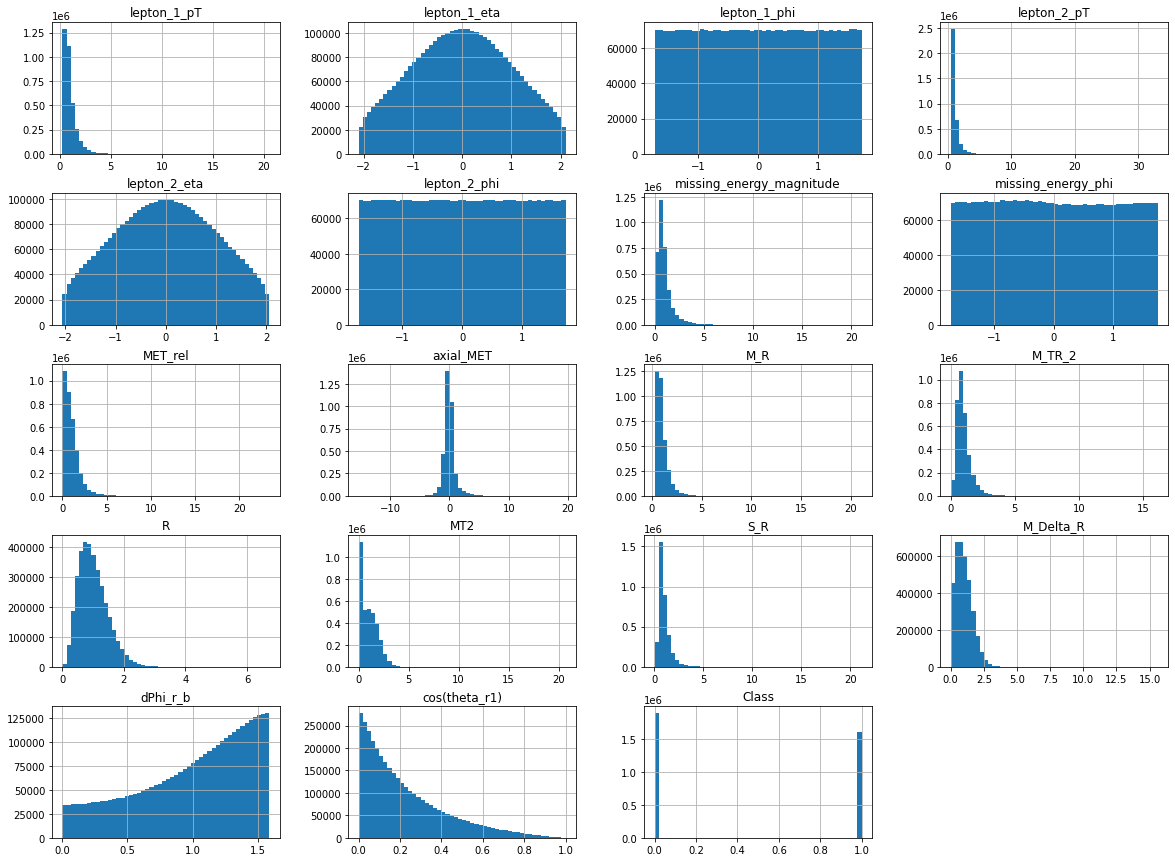

In [ ]:
Train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
Test= Test.drop(['Unnamed: 0'], axis='columns')

In [ ]:
X=X.fillna(0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [ ]:
model.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predicted = model.predict(Test)
y_predicted

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
len(y_predicted)

1500000

In [ ]:
res = pd.DataFrame(y_predicted)
#res.to_csv("prediction_ML.csv",index_label = 'Id',header = ['class'])

In [ ]:
res[0]

0          1
1          0
2          0
3          1
4          1
          ..
1499995    0
1499996    0
1499997    0
1499998    1
1499999    0
Name: 0, Length: 1500000, dtype: int64

In [ ]:
res[0] = res[0].astype(float)

In [ ]:
res[0]

0          1.0
1          0.0
2          0.0
3          1.0
4          1.0
          ... 
1499995    0.0
1499996    0.0
1499997    0.0
1499998    1.0
1499999    0.0
Name: 0, Length: 1500000, dtype: float64

In [ ]:
res.to_csv("prediction_ML.csv",index_label = 'Id',header = ['class'])

# Using SVM Model

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
# Train the model using the training data
model.fit(X, y)
y_pred = model.predict(Test)
# Calculate the accuracy of the model
accuracy = sum(y_pred == y_test) / len(y_test)

In [ ]:
y_pred

## SVM Model also gives the same accuracy as that of Logistic Regression


# Now Using Xgboost

## I used XGBoost (eXtreme Gradient Boosting) because it is a powerful machine learning algorithm particularly good at handling large datasets with a large number of features. It is an implementation of gradient boosting, which is a type of ensemble learning algorithm that combines the predictions of multiple simpler models (such as decision trees) to create a more accurate overall prediction. It is also customizable, with a number of hyperparameters that can be tuned to achieve the best performance for a specific problem.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier 
import xgboost as xgb

In [ ]:
num_cols = X.select_dtypes(include="number").columns

In [ ]:
from sklearn.preprocessing import StandardScaler from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="mean")), ("scale", StandardScaler())]) full_processor = ColumnTransformer(
transformers=[("numeric", numeric_pipeline, num_cols)])

In [ ]:
num_cols1 = Test.select_dtypes(include="number").columns

In [ ]:
X_processed1 = full_processor.fit_transform(Test)

In [ ]:
X_processed = full_processor.fit_transform(X) 
xgb_cl = xgb.XGBClassifier() 
xgb_cl.fit(X_processed, y)
preds = xgb_cl.predict(Test)

In [ ]:
Preds = xgb_cl.predict(X_processed1)

In [ ]:
Preds3 = pd.DataFrame(Preds)

In [ ]:
Preds3[0] = Preds3[0].astype(float)

In [ ]:
Preds3.to_csv("Output_ML_LAB.csv",index_label = 'Id', header = ['class'])

## The predicted value is 80.289% times predicting the correct value. 

# Using Hyper Parameter for xgboost

In [ ]:
import xgboost as xgb
# Define the hyperparameters
params = { 'max_depth': 5,
    'n_estimators': 450,
    'subsample': 0.85,
    'min_child_weight': 10
}
# Create the XGBoost model
model = xgb.XGBClassifier(**params)
# Fit the model to the training data
model.fit(X_processed, y)

In [ ]:
preds1 = xgb.predict(Test)